In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load Image

(600, 1000, 3)


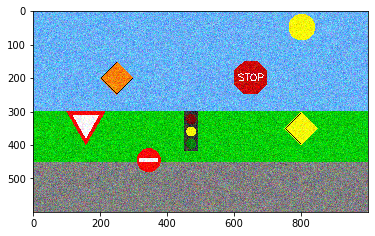

In [6]:
img = cv2.imread('scene_all_signs_noisy.png')
print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Split Channel

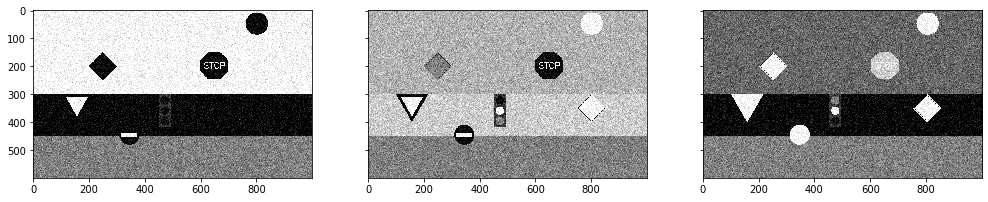

In [7]:
b,g,r = cv2.split(img)

f, axarr = plt.subplots(1, 3, figsize=(17, 15), sharey=True)
axarr[0].imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

plt.show()

# Denoise via fastNlMeansDenoisingColored

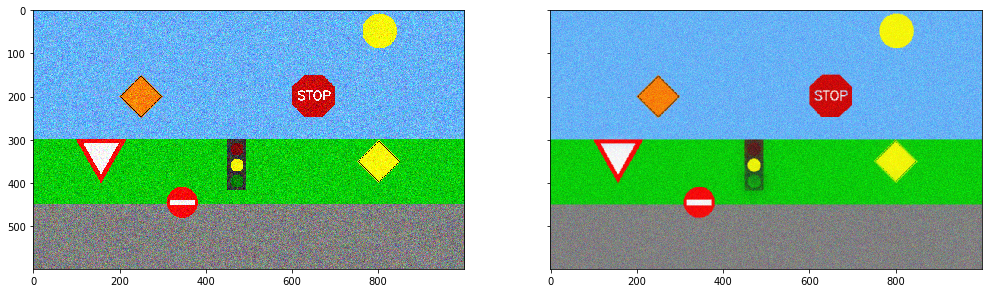

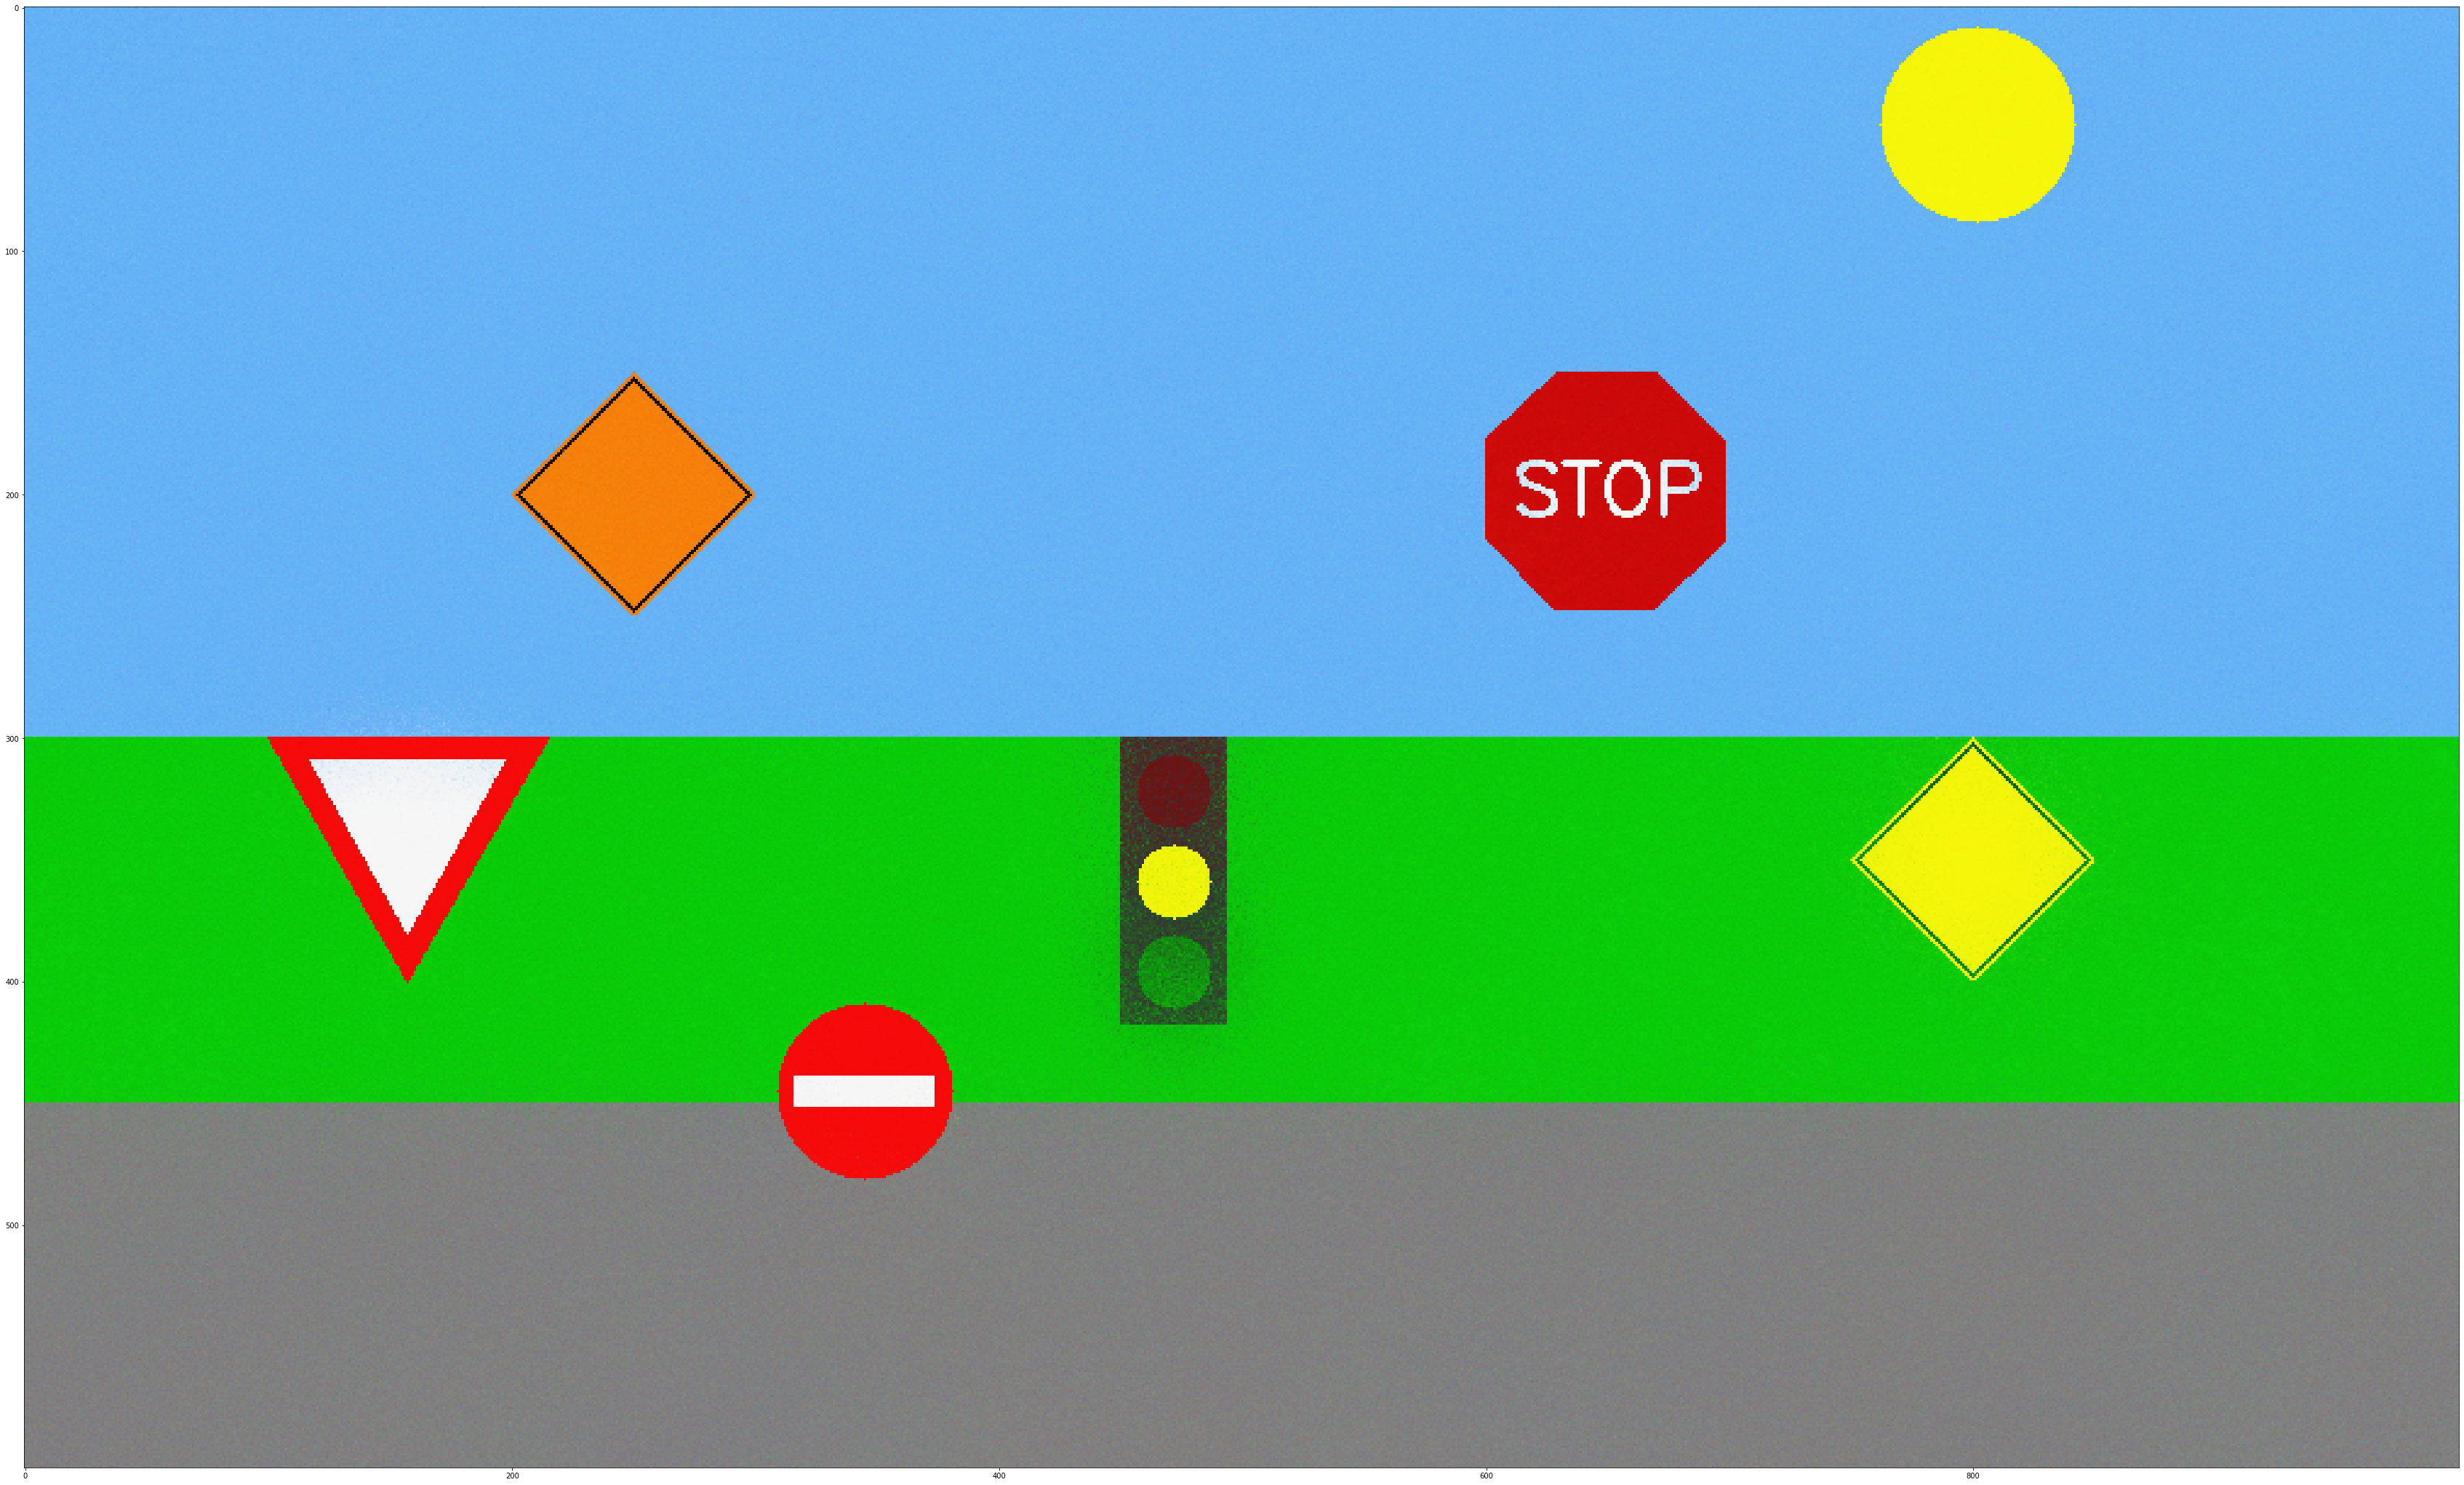

In [52]:
# dst = cv.fastNlMeansDenoisingColored(	src[, dst[, h[, hColor[, templateWindowSize[, searchWindowSize]]]]]	)
denoised_img = cv2.bilateralFilter(img, 70, 100, 100)
# denoised_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,21)
blur = cv2.GaussianBlur(denoised_img,(3,3),1)
smooth = cv2.addWeighted(blur,1.5,img,-0.5,0)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

f, axarr = plt.subplots(1, 2, figsize=(17, 15), sharey=True)
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(smooth, cv2.COLOR_BGR2RGB))
# axarr[1, 0].imshow(cv2.cvtColor(denoised_ing, cv2.COLOR_BGR2RGB))
# plt.show()

plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
def color_filter_bgr(img_in, bgr, tolerance):
    min_bgr = np.array([bgr[0] - tolerance, bgr[1] - tolerance, bgr[2] - tolerance])
    max_bgr = np.array([bgr[0] + tolerance, bgr[1] + tolerance, bgr[2] + tolerance])

    mask_bgr = cv2.inRange(img_in, min_bgr, max_bgr)
    img_binary = cv2.bitwise_and(img_in, img_in, mask=mask_bgr)

    return img_binary

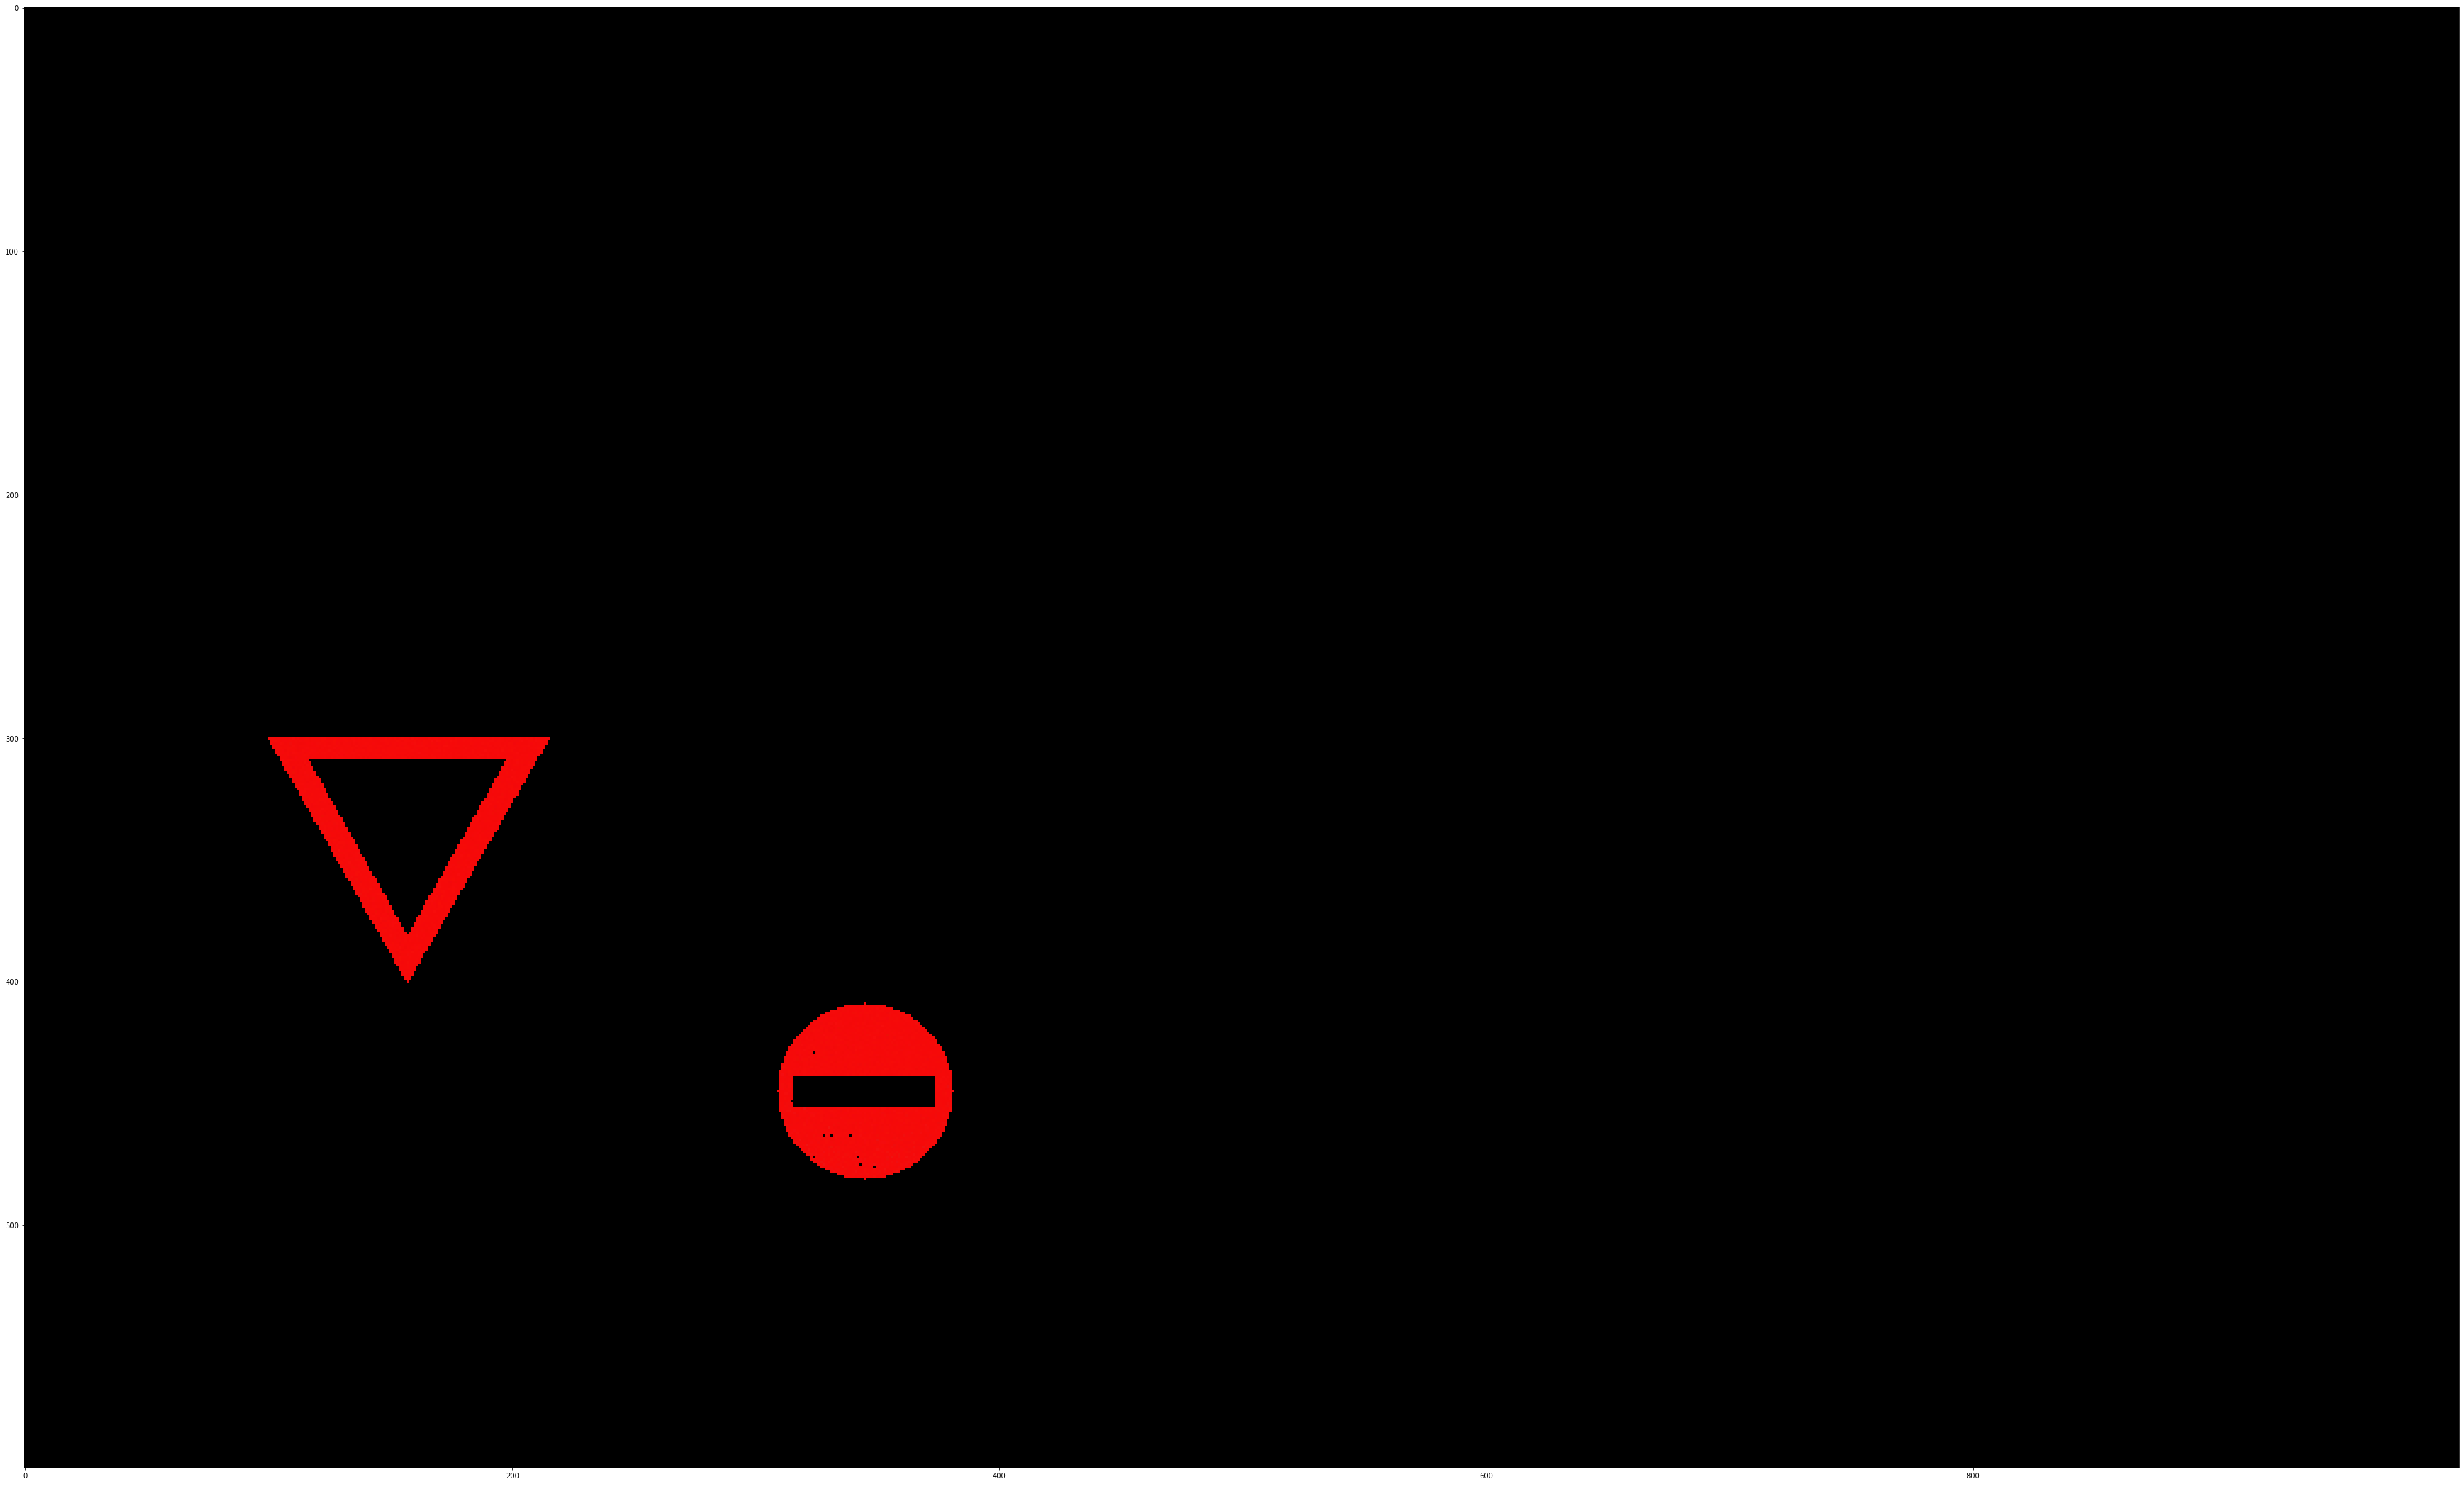

In [79]:
img_in = denoised_img

bgr = [0, 0, 255]
tolerance = 20
img_binary = color_filter_bgr(img_in, bgr, tolerance)

plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
plt.show()